In [2]:
import pandas as pd

# Cargar los DataFrames
df_form = pd.read_json('dataframe_final_formulario.json', lines=True)
df_palas = pd.read_csv('df_scaled_palas.csv')

# Verificar si ambos DataFrames tienen el mismo número de filas
if len(df_form) == len(df_palas):
    # Verificar si 'Score_Escalar' existe en df_form
    if 'Score_Escalar' in df_form.columns:
        # Añadir la columna 'Score_Scalar' a df_palas
        df_palas['Score_Escalar'] = df_form['Score_Escalar'].values

        # Crear una copia del DataFrame actualizado
        df_palas_copia = df_palas.copy()

        # Mostrar el resultado
        print("Columna 'Score_Scalar' añadida correctamente:")
        print(df_palas_copia.head())
    else:
        print("La columna 'Score_Escalar' no existe en df_form.")
else:
    print("Los DataFrames no tienen el mismo número de filas.")
    # Ajustar los tamaños si es necesario
    min_rows = min(len(df_form), len(df_palas))
    df_form = df_form.iloc[:min_rows]
    df_palas = df_palas.iloc[:min_rows]

    # Añadir la columna después del ajuste
    if 'Score_Escalar' in df_form.columns:
        df_palas['Score_Escalar'] = df_form['Score_Escalar'].values
        df_palas_copia = df_palas.copy()
        print("Columna 'Score_Escalar' añadida después del ajuste:")
        print(df_palas_copia.head())
    else:
        print("La columna 'Score_Escalar' no existe en df_form.")


Los DataFrames no tienen el mismo número de filas.
Columna 'Score_Escalar' añadida después del ajuste:
                         Palas  Precio        Marca            Color  Balance  \
0              HARLEM EUPHORIA   63.95      No data     negro, verde        0   
1    VARLION LW DIFUSOR W 2021  149.95      varlion      negro, rosa        1   
2  DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown      negro, azul        1   
3    BLACK CROWN PITON 11 2023   86.95       dunlop             rosa        1   
4           SIUX FURTIVE PRO 2   62.95         siux  negro, amarillo        2   

   Nucleo  Cara  Dureza  Nivel de Juego  Forma  Superficie  Tipo de Juego  \
0       4     0       0               2      0           1              0   
1       4     0       0               2      1           2              0   
2       2     2       0               2      1           1              1   
3       4     1       1               1      1           2              1   
4       4     1       0  

Datos del registro seleccionado (índice 11):
Palas             SIUX PEGASUS REVOLUTION 2
Precio                                349.0
Marca                                  siux
Color                                 negro
Balance                           2 (medio)
Nucleo                       2 (medium eva)
Cara                            0 (No data)
Dureza                             3 (dura)
Nivel de Juego                 2 (avanzado)
Forma                           0 (No data)
Superficie                         1 (lisa)
Tipo de Juego               2 (polivalente)
Jugador                              hombre
score_lesion                       0.634615
score_nivel                        0.564899
Score_Escalar                      0.149254
Name: 11, dtype: object


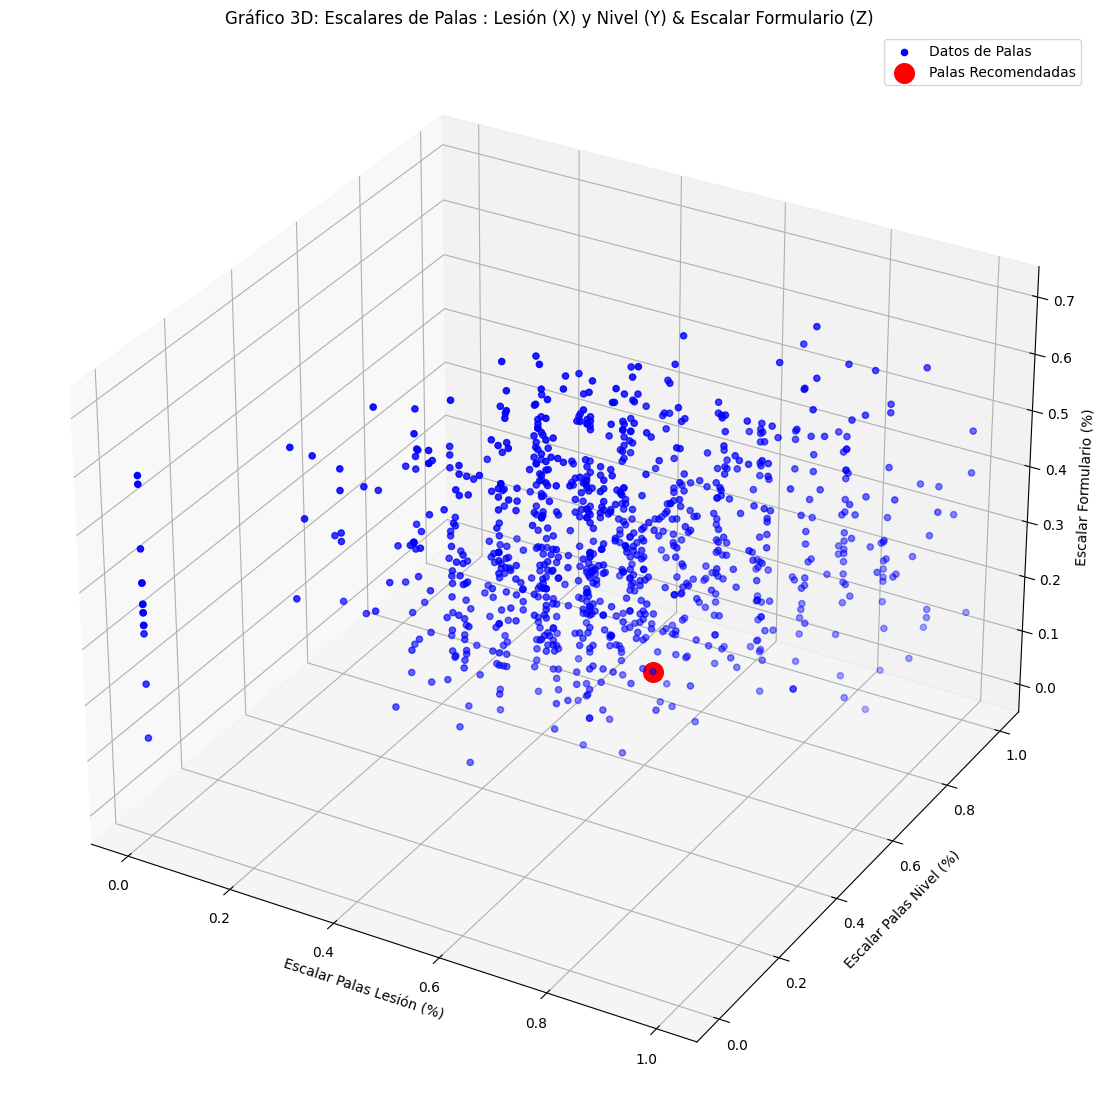

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el diccionario de mapeo
label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
}

# Crear el mapeo inverso para convertir valores numéricos a etiquetas
mapeo_inverso = {columna: {v: k for k, v in mapeo.items()} for columna, mapeo in label_mapping.items()}

def seleccionar_fila(df_form, index=None):
    """
    Selecciona una fila específica del DataFrame de formulario según el índice proporcionado.
    Muestra por pantalla los datos del registro seleccionado con valores mapeados.

    Args:
        df_form (pd.DataFrame): DataFrame que contiene los datos del formulario.
        index (int, opcional): Índice de la fila a seleccionar.

    Returns:
        tuple: Valores de 'score_lesion', 'score_nivel', 'Score_Escalar' de la fila seleccionada.
    """
    # Validar si el índice está dentro del rango del DataFrame
    if index < 0 or index >= len(df_form):
        raise IndexError(f"El índice proporcionado ({index}) está fuera del rango del DataFrame (0 a {len(df_form) - 1}).")
    
    # Seleccionar la fila específica
    selected_row = df_palas_copia.iloc[index]
    
    # Mapear los valores numéricos a etiquetas descriptivas directamente en selected_row
    selected_row_mapeado = selected_row.copy()
    for columna, mapping in label_mapping.items():
        if columna in selected_row.index:
            valor_numerico = selected_row[columna]
            etiqueta = mapeo_inverso[columna].get(valor_numerico, "No data")
            selected_row_mapeado[columna] = f"{valor_numerico} ({etiqueta})"
    
    # Mostrar por pantalla los datos seleccionados con valores mapeados
    print(f"Datos del registro seleccionado (índice {index}):")
    print(selected_row_mapeado)

    # Extraer los valores necesarios para el gráfico
    x = selected_row['score_lesion']
    y = selected_row['score_nivel']
    z = selected_row['Score_Escalar']

    return x, y, z

def crear_grafico_3d(df_palas_copia, x_random, y_random, z_random):
    """Crea un gráfico 3D con los datos de palas y formulario."""
    
    # Crear figura y gráfico en 3D
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')

    # Datos del DataFrame principal (df_palas_copia)
    x = df_palas_copia['score_lesion'] 
    y = df_palas_copia['score_nivel'] 
    z = df_palas_copia['Score_Escalar']

    # Gráfico de dispersión para df_palas
    ax.scatter(x, y, z, color='blue', label='Datos de Palas')

    # Gráfico del punto adicional para el formulario
    ax.scatter(x_random, y_random, z_random,
               color='red', s=200, label='Palas Recomendadas')

    # Configuración del gráfico
    ax.set_xlabel('Escalar Palas Lesión (%)')
    ax.set_ylabel('Escalar Palas Nivel (%)')
    ax.set_zlabel('Escalar Formulario (%)')
    ax.set_title('Gráfico 3D: Escalares de Palas : Lesión (X) y Nivel (Y) & Escalar Formulario (Z)')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

if __name__ == "__main__":
    try:

        # Cargar los DataFrames desde archivos
        df_form = pd.read_json('dataframe_final_formulario.json', lines=True)
        df_palas = pd.read_csv('df_scaled_palas.csv')

        # Ajustar tamaños si son diferentes
        if len(df_form) != len(df_palas):
            min_rows = min(len(df_form), len(df_palas))
            df_form = df_form.iloc[:min_rows]
            df_palas = df_palas.iloc[:min_rows]

        # Añadir la columna 'Score_Escalar'
        if 'Score_Escalar' in df_form.columns:
            df_palas['Score_Escalar'] = df_form['Score_Escalar'].values

            # Crear una copia explícita del DataFrame actualizado
            df_palas_copia = df_palas.copy()
        else:
            raise KeyError("La columna 'Score_Escalar' no existe en df_form.")

        # Solicitar al usuario que introduzca un índice para seleccionar una fila
        index = int(input("Introduzca un número de registro entre 1 y {}: ".format(len(df_form)))) - 1

        # Seleccionar coordenadas específicas del formulario usando el índice proporcionado
        x, y, z = seleccionar_fila(df_form,
                                   index=index)

        # Crear el gráfico 3D con los valores seleccionados
        crear_grafico_3d(df_palas_copia, x, y, z)

    except ValueError as e:
        print(f"Error: {e}")

In [4]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

# Crear los puntos de referencia con sus coordenadas X, Y, Z
reference_points = pd.DataFrame({
    'score_lesion': [x_random] * 3,
    'score_nivel': [y_random] * 3,
    'Balance': [1, 2, 3]
})

# Preparar los datos de df_palas para aplicar kNN
# Aseguramos que 'Palas' esté en el DataFrame para poder recuperar los nombres
palas_data = df_palas_copia[['score_lesion', 'score_nivel', 'Score_Escalar', 'Balance', 'Palas']].copy()

# Entrenar el modelo kNN con las columnas relevantes (sin la columna 'Palas')
knn = NearestNeighbors(n_neighbors=3)
knn.fit(palas_data[['score_lesion', 'score_nivel', 'Balance']])

# Encontrar los 3 vecinos más cercanos para cada punto de referencia
results = {}
for index, point in reference_points.iterrows():
    distances, indices = knn.kneighbors([point])
    closest_points = palas_data.iloc[indices[0]]
    results[f'Punto {point["Balance"]}'] = closest_points

# Mostrar los resultados con los nombres de las palas
for key, value in results.items():
    print(f"Vecinos más cercanos a {key}:")
    print(value[['Palas', 'score_lesion', 'score_nivel', 'Score_Escalar', 'Balance']], "\n")


NameError: name 'x_random' is not defined